In [9]:
import matplotlib.pyplot as plt
import numpy as np
import torch

## Linear regression

$$ y_i = x_{ij} w_j + b$$

$$ y_i = x_{ij} w_j, \quad x_{i,-1}=1,\quad b=w_{-1} $$

In [2]:
def linear(x,w):
    return x @ w

Generate a random feature vector $\mathbf{x}$ witch 10000 samples and three feature 
such that first feature is drawn from N(0,1), second feature from  U(,1) and third from N(1,2).

N(mu,sigma) denotes normal distribution with mean mu and standard deviation sigma. You can use ``numpy.random.normal`` and ``numpy.random.uniform`` functions.

Using $\mathbf{x}$ and weights w = [0.2, 0.5,-0.25,1.0] generate output $\mathbf{y}$ assuming a $N(0,0.1)$ noise $\mathbf{\epsilon}$. 

$$ y_i = x_{ij} w_j+\epsilon_i, \quad x_{i,-1}=1,\quad b=w_{-1} $$

#### Loss

$$ \frac{1}{2}\frac{1}{N}\sum_{i=0}^{N-1} (y_i -  x_{ij} w_j  )^2$$

## Gradient descent 

### Problem 1 

Find the gradient of the loss function with respect to weights.

Write gradient function ``grad(y,x,w)``.

In [3]:
def grad(x,y,w):
    return np.array((
        np.sum( derivative_x(x,y,w)),
        np.sum(derivative_y(x,y,w))
    ))/(2*len(x))
    
def derivative_x(x, y, w):
    return -2*y*w+2*x*np.power(w,2)
def derivative_y(x, y, w):
    return 2*y-2*x*w
# def derivative_w(x, y, w):
#     return -2*y*w+2*pow(x,2)*w

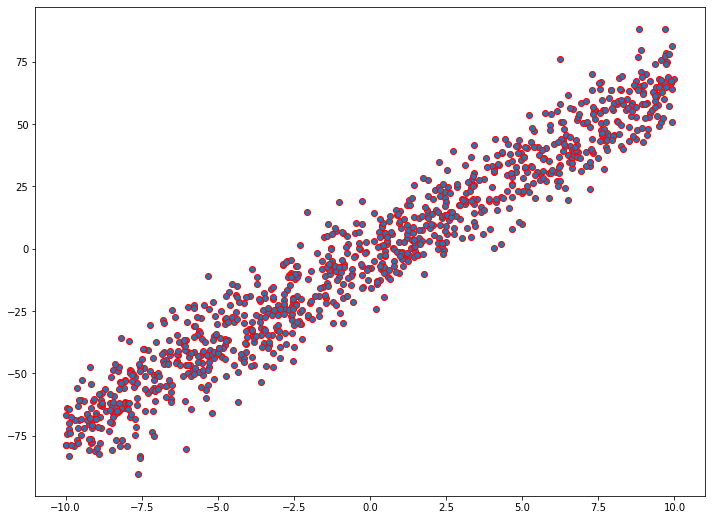

In [4]:
#Generate data    
plt.rcParams['figure.figsize'] = (12.0, 9.0)
n = 1000
X = np.random.uniform(-10,10, n) 
noise = np.random.normal(0, 10, n) # Gaussian distribution
true_w, true_b = 7, -3 #true line 
Y = true_w * X + true_b + noise # y = w * x + b + ε
plt.scatter(X, Y,edgecolors="r")

### Problem 2

Implement gradient descent for linear regression.

y = 7.01 x - 1.89


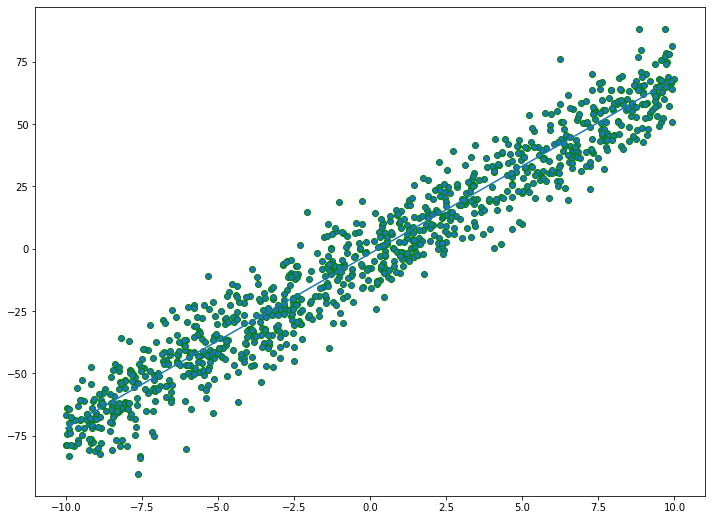

In [5]:
def gradient_descent(X, y, w, b, learning_rate=0.000001):
    dw = -2 * np.sum(X * (y - w * X - b)) # ∂e/∂w
    db = -2 * np.sum(y - w * X - b)       # ∂e/∂b
    w_new = w - learning_rate * dw        # minus sign since we are minizing e
    b_new = b - learning_rate * db
    return w_new, b_new

#CORE
max_epoch = 500
w, b = -1,0

for epoch in range(1,max_epoch+1):
    w,b = gradient_descent(X, Y, w, b)
    
    # if epoch % 50 == 1:
    #     print(f'{get_loss(X,Y,w,b):.0f}')
    # if epoch < 20 and epoch%3 == 0:
    #     plt.scatter(X, Y,edgecolors="r")
    #     plt.plot([-10,10], [w * -10 + b,w * 10 + b])
    #     plt.show()
    
if b > 0:
    print(f'y = {w:.2f} x + {b:.2f}')
else:
    print(f'y = {w:.2f} x - {-b:.2f}')
plt.scatter(X, Y,edgecolors="g")
plt.plot([-10,10], [w * -10 + b,w * 10 + b])
plt.show()

### Problem 3

Implement stochastic gradient descent (SGD).

In [6]:
max_epoch = 100000
w_s, b_s = -1,0

for epoch in range(1,max_epoch+1):
    sample = np.random.randint(0,n)
    x = X[sample]
    y= Y[sample]
    w_s,b_s = gradient_descent(x, y, w_s, b_s, 0.00001)
    # if epoch % 1000 == 1:
    #     print(f'y = {w_s:.2f} x + {b_s:.2f}')
        
print(f'y = {w_s:.2f} x + {b_s:.2f}')

y = 7.02 x + -2.55


### Problem 4

Implement SGD using pytorch. Start by just rewritting Problem 3 to use torch Tensors instead of numpy arrays. 

To convert frrom numpy arrays to torch tensors you can use ``torch.from_numpy()`` function. 

In [24]:
def gradient_descent_tensor(X, y, w, b, learning_rate=0.000001):
    dw = -2 * torch.sum(X * (y - w * X - b)) # ∂e/∂w
    db = -2 * torch.sum(y - w * X - b)       # ∂e/∂b
    w_new = w - learning_rate * dw        # minus sign since we are minizing e
    b_new = b - learning_rate * db
    return w_new, b_new

device = 'cuda' if torch.cuda.is_available() else 'cpu'
x_tensor = torch.from_numpy(X).float().to(device)
y_tensor = torch.from_numpy(Y).float().to(device)
torch.manual_seed(42)
n_epochs = 1000
w_t = torch.randn(1, requires_grad=False, dtype=torch.float, device=device)
b_t = torch.randn(1, requires_grad=False, dtype=torch.float, device=device)
for epoch in range(1,n_epochs+1):
    w_t,b_t = gradient_descent_tensor(x_tensor, y_tensor, w_t, b_t)

print(w_t, b_t)

tensor([7.0025], device='cuda:0') tensor([-2.5442], device='cuda:0')


### Problem 5 

Implement GD using pytorch automatic differentiation.

To this end the variable with respect to which the gradient will be calculated, ``t_w`` in this case, must have attribute
``requires_grad`` set to ``True`` (``t_w.require_grad=True``).

The torch will automatically track any expression containing ``t_w`` and store its computational graph. The method ``backward()`` can be run on the final expression to back propagate the gradient e.g. ``loss.backward()``. Then the gradient is accesible as ``t_w.grad``.

In [29]:
import torch.optim as optim
import torch.nn as nn

In [32]:
torch.manual_seed(42)
n_epochs = 1000
learning = 0.01
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
loss_fn = nn.MSELoss(reduction='mean')
optimizer = optim.SGD([a,b], lr=learning)
for epoch in range(1,n_epochs+1):
    yhat = a + b * x_tensor
    # error = y_tensor - yhat
    # loss = (error ** 2).mean() 
    loss = loss_fn(y_tensor,yhat)
    loss.backward()
    # with torch.no_grad():
    #     a -= lr * a.grad
    #     b -= lr * b.grad
    optimizer.step()
    # a.grad.zero_()
    # b.grad.zero_()
    optimizer.zero_grad()
print(a,b)

tensor([-2.9574], device='cuda:0', requires_grad=True) tensor([6.9998], device='cuda:0', requires_grad=True)
